In [1]:
from sympy import *
init_printing(use_latex=True)
from IPython.display import display

## 行列，ベクトルの生成

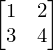

In [3]:
from sympy import *

list_a = [1,2]
list_b = [3,4]
A=Matrix([list_a, list_b])
A

In [4]:
x,y = symbols('x,y')
v1=Matrix([x,y])
v1

## ゼロ行列，単位行列

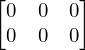

In [5]:
zeros(2,3)

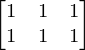

In [6]:
ones(2,3)

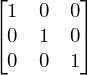

In [7]:
eye(3)

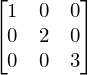

In [8]:
diag(1,2,3)

## 行列要素のとりだし，追加

In [9]:
A=Matrix([[1,2,3],[4,5,6],[7,8,9]])
# i行j列
A[1,1]

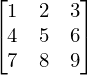

In [17]:
A

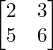

In [16]:
A[:2,1:3] # [0~1, 2~3]

In [18]:
col_0 = A[:,0] # [all, 0]
col_0

In [20]:
row_1 = A[1,:]
row_1

### 行・列の拡張

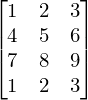

In [21]:
b = Matrix([1,2,3])
A.row_insert(3,b.T)

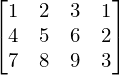

In [22]:
A.col_insert(3,b)

## 行列・ベクトル間の単純な演算

### 次元の確認

In [23]:
A.shape

In [26]:
display(v1)
print(v1.shape)
print(v1.T.shape)

(2, 1)
(1, 2)


## 転置(transpose)

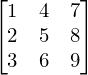

In [27]:
A.T

In [28]:
v1.T

## ドット積(内積)

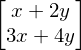

In [29]:
A = Matrix([[1,2],[3,4]])
A*v1

In [30]:
v1.T*v1 #v1*v1ではerror

In [31]:
v1.T*A

In [32]:
v1.T*v1

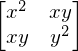

In [33]:
v1*v1.T

## 外積，outer, cross

In [34]:
v1 = Matrix([1,1,3])
v2 = Matrix([1,2,-1])

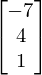

In [35]:
v1.cross(v2)

## スカラー三重積¶

In [36]:
v3 = Matrix([-1,2,1])
v3.dot(v1.cross(v2))

## 行列操作

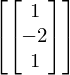

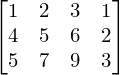

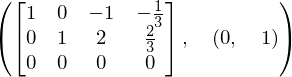

In [38]:
A=Matrix([[1,2,3],[4,5,6],[5,7,9]])
display(A.nullspace())
Aex = A.col_insert(3,b)
display(Aex)
Aex.rref() # rref is stand for reduced row echelon form.

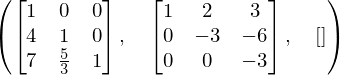

In [39]:
A=Matrix([[1,2,3],[4,5,6],[7,9,8]])
L, U, P = A.LUdecomposition()
L, U, P

## 階数, rank

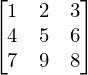

In [40]:
display(A)

display(A.rank())

## 行列式, determinant

In [41]:
c = Matrix([[1,1],[1,2]])
print(c.det())

a = Matrix([[1,2],[3,4]])
a.det()

1


### 課題

次の行列式の計算を確認せよ.
$$ 
\left|
\begin {array}{cccc} 
1+a & 1 & 1 & 1\\
1 & 1+b & 1 & 1\\
1 & 1 & 1+c & 1\\
1 & 1 & 1 & 1+d
\end {array} \right|
= abcd \left(1+\sum_{i=a}^d \frac{1}{i}\right)
$$

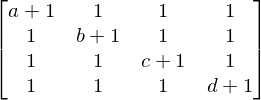

In [43]:
a,b,c,d,x,y,z = symbols('a b c d x y z')

A = Matrix([[1+a,1,1,1],[1,1+b,1,1],[1,1,1+c,1],[1,1,1,1+d]]
)
display(A)
simplify(A.det())

## 逆行列

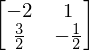

In [44]:
A = Matrix([[1,2],[3,4]])
A.inv()

### 課題

次の連立方程式を解け.

$$ 
\left\{
\begin {array}{cl} 
x+y+z&=0\\
ax+by+cz&=0\\
bcx+cay+abz&=(a-b)(b-c)(c-a)
\end {array} \right.
$$

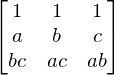

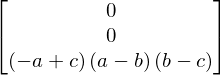

In [46]:
a,b,c,x,y,z = symbols('a b c x y z')

A = Matrix([[1,1,1],[a,b,c],[b*c,c*a,a*b]])
bb = Matrix([0,0,(a-b)*(b-c)*(c-a)])
display(A)
display(bb)
Ainv = A.inv()
res = Ainv * bb
display(simplify(res[0]))
display(simplify(res[1]))
display(simplify(res[2]))

## 固有値，固有ベクトル

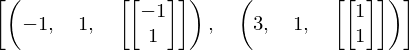

In [47]:
A = Matrix([[1,2],[2,1]])
A.eigenvects()

## ベクトルの規格化

In [48]:
v1=Matrix(A.eigenvects()[0][2])
v2=Matrix(A.eigenvects()[1][2])

simplify(v1.T*v1)

In [49]:
v_norm = v1.norm()
v_norm

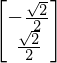

In [50]:
v1n = v1/v_norm
v1n

## 対角化

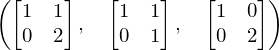

In [51]:
D = diag(1,2)
P = Matrix([[1,0],[1,1]]).T
A = P*D*P.inv()
A, P, D

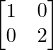

In [52]:
P,D = A.diagonalize()

P.inv()*A*P

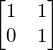

In [53]:
eigs = A.eigenvects()
v1 = eigs[0][-1][0]
v2 = eigs[1][-1][0]

Matrix([v1,v2]).reshape(2,2).T

> 対角化行列Pをeigenvectsから作ろうとして苦労した．まず，固有ベクトルの取り出しが自動的にできない．重複しているときには，固有ベクトルは二つ出てくる．さらに，タプルからの取り出しがこれでいいいのか．．．さらに，ベクトルから行列を作るときに横置きのができない．うううんん．他のやり方をしたでやってみる．上では仕方がないので，一旦4x1のMatrixにしてそのあとreshape，さらにTransposeで．．．

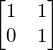

In [54]:
v1.col_insert(1,v2)

> 結論：3つほど上でやっているdiagonalizeで取り出しましょう．重複があっても取り出してくれるんで．

### 課題


行列
$$
A\, := \, \left[
\begin {array}{ccc} 
2&0&1\\
0&3&0\\
1&0&2
\end {array} \right]
$$

を対角化する変換行列$P$を求め，対角化せよ．

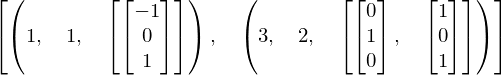

In [55]:
A = Matrix([[2,0,1],[0,3,0],[1,0,2]])
evs = A.eigenvects()
evs

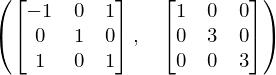

In [56]:
P,D = A.diagonalize()
P,D

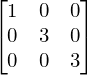

In [57]:
P.inv()*A*P